# Background
경험적으로 한 번 손실 본 종목은 재진입시 또 손실을 보는 것 같다.  
실제로도 그런지 확인해본다.  
유튜브: https://youtu.be/nFlMgOACpao

# Import

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [79]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,매도시간,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억)
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,09:21:27,198440,16.22,24.44,6.22,1,4.38,9.72,113,25
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,09:32:19,198440,20.22,24.44,6.22,1,0.93,1.72,113,16
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,10:51:17,198440,20.91,24.44,6.22,1,0.35,0.09,113,2
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,09:55:24,3520,6.60,10.10,0.19,1,1.57,1.94,62,0
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,09:59:56,66410,11.58,18.85,3.09,1,0.87,2.06,72,3


# Preprocessing
주문일자, 종목명

In [80]:
date = df.주문일자.unique()
firm = df.종목명.unique()

In [81]:
first_win = []
first_lose = []
win = []
lose = []

for i in date:
    frame = df[df['주문일자'] == i]
    for j in firm:
        dataframe = frame[frame['종목명'] == j].reset_index(drop=True)
        
        try:
            first = float(dataframe.iloc[0]['수익률'])
            if first > 0:
                for k in range(len(dataframe)-1):
                    win.append(dataframe.iloc[k+1]['수익률'])
                    first_win.append(first)
            else:
                for k in range(len(dataframe)):
                    lose.append(dataframe.iloc[k+1]['수익률'])
                    first_lose.append(first)
        except:
            pass

In [82]:
print(win, ' ', end='')

[1.85, 0.15, 3.51, 0.0, -0.84, 7.73, 0.0, -3.61, -1.67, -2.07, -3.58, -1.28, -1.17, 2.0, 1.36, 0.46]  

In [83]:
print(lose, ' ', end='')

[2.14, -1.33, -1.01, 0.11, -1.19, 4.18, 0.4, 2.31, -1.96, 0.0, -0.82, -0.4, 2.5, -1.2, 0.0, -1.72, -2.83, -1.39]  

# Visualization

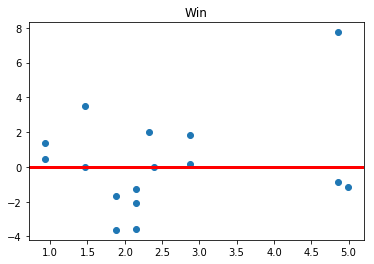

In [84]:
plt.scatter(first_win, win)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('Win')
plt.show()

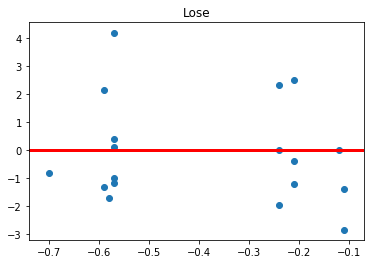

In [85]:
plt.scatter(first_lose, lose)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('Lose')
plt.show()

# Mean

In [93]:
win_mean = round(np.mean(win),2)
lose_mean = round(np.mean(lose),2)

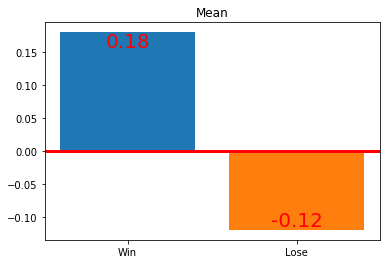

In [102]:
plt.bar('Win', win_mean)
plt.bar('Lose', lose_mean)
plt.axhline(y=0, color='r', linewidth=3)
plt.text('Win', win_mean, win_mean, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text('Lose', lose_mean, lose_mean, color='r', horizontalalignment='center', verticalalignment='bottom', fontsize=20)
plt.title('Mean')
plt.show()

# Median

In [103]:
win_median = round(np.median(win),2)
lose_median = round(np.median(lose),2)

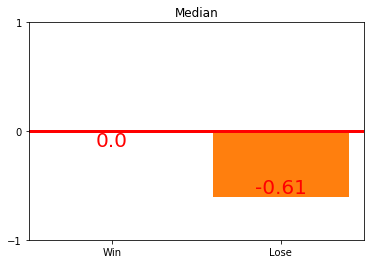

In [106]:
plt.bar('Win', win_median)
plt.bar('Lose', lose_median)
plt.axhline(y=0, color='r', linewidth=3)
plt.text('Win', win_median, win_median, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text('Lose', lose_median, lose_median, color='r', horizontalalignment='center', verticalalignment='bottom', fontsize=20)
plt.yticks([-1,0,1])
plt.title('Median')
plt.show()

# Results
첫 매매에서 수익일 경우 후속 매매의 수익률은  
mean = 0.18%  
median = 0%  
  
첫 매매에서 손실일 경우 후속 매매의 수익률은  
mean = -0.12%    
median = -0.61%

# Conclusion
경험과 일치하는 결과다.   

첫 매매에서 수익을 볼 경우 재진입해도 수익이다.  
하지만 첫 매매에서 손실을 볼 경우 재진입하면 손실이다.  

따라서 손실 본 종목은 재진입하지 않도록 조심한다.  